### 傅里叶变换

傅里叶变换是一种在数学、工程学、物理学等领域非常重要的数学工具，它能够将一个在时域（或空间域）的信号转换到频域，使我们能够更容易地分析和处理信号。
- 时域信号：描述信号如何随时间（或空间位置）变化。
- 频域信号：描述信号的频率成分及其对应的振幅和相位。

傅里叶变换的作用：
- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

滤波：
- 高通滤波器：只保留高频（只保留边界），会使得图像细节增强

- 低通滤波器：只保留低频（只保留非边界），会使得图像模糊

##### dst = cv2.dft(src, dst=None, flags=None, nonzeroRows=None)


cv2.dft() 函数是 OpenCV 库中的一个函数，用于执行二维离散傅里叶变换（2D Discrete Fourier Transform，2D-DFT）。这个函数在图像处理和计算机视觉中非常有用，因为它可以将图像从空间域转换到频率域。

参数：
- src: 输入图像，需要是浮点型（32位单精度或64位双精度），通常是灰度图像或者是已经转换为多通道浮点表示形式的彩色图像。
- dst: 与src大小和类型相同的输出数组，可以用来存储DFT的结果。
- flags: 计算DFT的标识，有几种不同的选项：
- - cv2.DFT_INVERSE: 执行反向DFT。
- - cv2.DFT_SCALE: 默认情况下，DFT的结果没有进行缩放。如果设置了此标识，输出将会乘以一个缩放因子，使得傅里叶变换是可逆的。
- - cv2.DFT_COMPLEX_OUTPUT: 默认情况下，输出是一个复数数组。
- - cv2.DFT_REAL_OUTPUT: 输出是一个实数数组。
- - cv2.DFT_COMPLEX_INPUT: 默认情况下，输入是实数数组。
- nonzeroRows: 当这个参数设置时，函数会计算DFT的子集，只计算那些指定行数的非零部分，这可以加速计算。

返回值：
- dst：DFT的结果是一个复数数组，其中实部和虚部分别表示图像的幅度和相位。通常，我们对DFT的结果进行进一步的处理，比如计算幅度谱（通过cv2.magnitude函数）或者进行滤波操作。

注意事项:
- 由于DFT的结果是复数，因此结果数组会有两个通道，分别代表实部和虚部。
- 通常在执行DFT之前，会对图像进行中心化处理，即将图像像素点沿两个方向（行和列）都平移N/2，其中N是图像的尺寸。这样做的目的是将直流分量（频率域中心点）移到图像的中心。
- 在OpenCV中，DFT的结果是沿cols轴优先的，即首先改变的是列。

##### dst = cv2.idft(src, dst=None, flags=None, nonzeroRows=None)

cv2.idft() 函数是 OpenCV 库中的一个函数，用于执行二维离散傅里叶逆变换（2D Inverse Discrete Fourier Transform，2D-IDFT）。这个函数在图像处理和计算机视觉中非常有用，因为它可以将图像从频率域转换回空间域。

参数：
- src: 输入数组，它是一个包含DFT结果的复数数组，通常由cv2.dft()函数产生。
- dst: 输出数组，与src大小和类型相同，用于存储IDFT的结果。如果dst是None，则函数会分配一个新的数组。
- flags: 计算IDFT的标识，有几种不同的选项：
- - cv2.DFT_INVERSE: 执行逆DFT，这是默认行为，因此通常不需要显式设置。
- - cv2.DFT_SCALE: 默认情况下，IDFT的结果没有进行缩放。如果设置了此标识，输出将会除以图像的总像素数，使得逆变换是可逆的。
- - cv2.DFT_REAL_OUTPUT: 如果设置了此标识，输出将是一个实数数组，这在src是复数数组时很有用。
- - cv2.DFT_COMPLEX_INPUT: 如果设置了此标识，则表示输入是一个复数数组。这是默认行为，通常不需要显式设置。
- nonzeroRows: 如果这个参数被设置，函数会计算IDFT的子集，只计算那些指定行数的非零部分，这可以加速计算。

返回值：
- dst 是执行傅里叶逆变换后的图像

注意事项
- IDFT的结果通常是复数，如果输入是复数数组，则输出也将是复数数组。
- 为了从频率域转换回空间域，通常需要先对频率域数据进行中心化，然后执行IDFT。因此，在执行cv2.idft()之前，通常需要使用np.fft.ifftshift()来逆转cv2.dft()之后的中心化过程。
- 如果在执行DFT时使用了cv2.DFT_SCALE标识，那么在执行IDFT时也应该使用cv2.DFT_SCALE标识，以确保逆变换是可逆的。

##### 示例

In [21]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt


def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(263, 263)
(263, 263, 2)


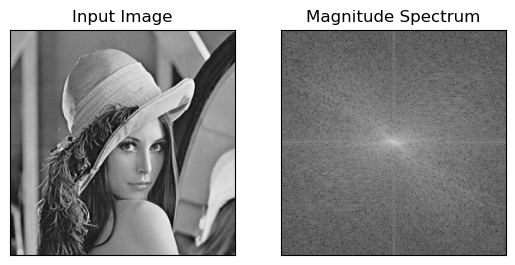

In [24]:
img = cv2.imread('assets/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 将图像数据转换为32位浮点数，这是因为傅里叶变换需要浮点数输入
img_float32 = np.float32(img)

# 计算图像的离散傅里叶变换
# flags = cv2.DFT_COMPLEX_OUTPUT表示输出应该包括实部和虚部，即复数输出
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

print(img_float32.shape)
print(dft.shape)

# 将DFT（离散傅里叶变换）结果从左上角为中心的格式转换为中心为中心的格式。这有助于更直观地理解频谱图
dft_shift = np.fft.fftshift(dft)
# 得到灰度图能表示的频谱
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

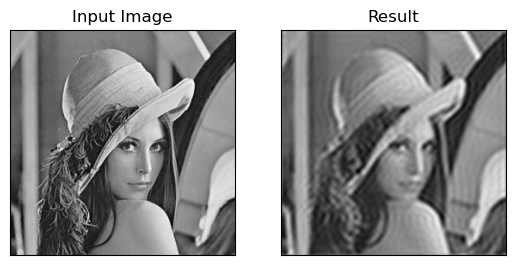

In [18]:
img = cv2.imread('assets/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()                              

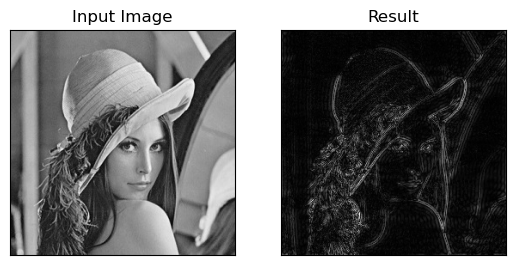

In [19]:
img = cv2.imread('assets/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()  